# The Carbonic Acid/Bicarbonate/Carbonate Equilibrium $\require{mhchem}$

Carbonic Acid ($\ce{H2CO3}$), Bicarbonate ($\ce{HCO3-}$) and Carbonate ($\ce{CO3^{2-}}$) form in water through the following equilibrium reactions:

$$ \ce{CO2 + H2O <=> H2CO3} $$
$$ \ce{H2CO3 <=> HCO3- + H+} $$
$$ \ce{HCO3- <=> CO3^{2-} + H+} $$

The distribution of carbonic acid, bicarbonate and carbonate is dependent on the pH of the water, and is easily simulated using PhreeqPython.

## Importing Modules
We start by importing phreeqpython package and creating a new PhreeqPython instance

In [1]:
%pylab inline
from phreeqpython import PhreeqPython
# create new PhreeqPython instance
pp = PhreeqPython()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Solution Definition

We define a simple solution that contains 1 mmol of Sodium Bicarbondate ($\ce{NaHCO3}$)

In [7]:
solution = pp.add_solution_simple({'NaHCO3':2.0})
print("This solution has a pkjbouinoinoinoinH of: {0:.2f} and a conductivity of: {1:.2f} uS/cm".format(solution.pH,solution.sc))

This solution has a pkjbouinoinoinoinH of: 8.27 and a conductivity of: 183.20 uS/cm


## List Definition
We initialize four arrays, one for the pH and one for each of the different carbonate species.

In [3]:
phs = []
co2 = []
hco3 = []
co3 = []

## Calculation Loop
We now iteratively change the pH to the desired value, using the **change_ph** function to dose either hydrochloric acid ($\ce{HCl}$) or lye ($\ce{NaOH}$). Using the **total** function we can find the total amount of carbon dioxide, bicarbonate and carbonate.

In [8]:
for pH in arange(0,14.1,1):
    # change the solution pH
    solution.change_ph(pH)
    # get and store the ph, CO2, HCO3 and CO3
    phs.append(pH)
    co2.append(solution.total('CO2')*1000)
    co3.append(solution.total('CO3')*1000)
    hco3.append(solution.total('HCO3')*1000)

## Display Results

Using matplotlib we can display the results:

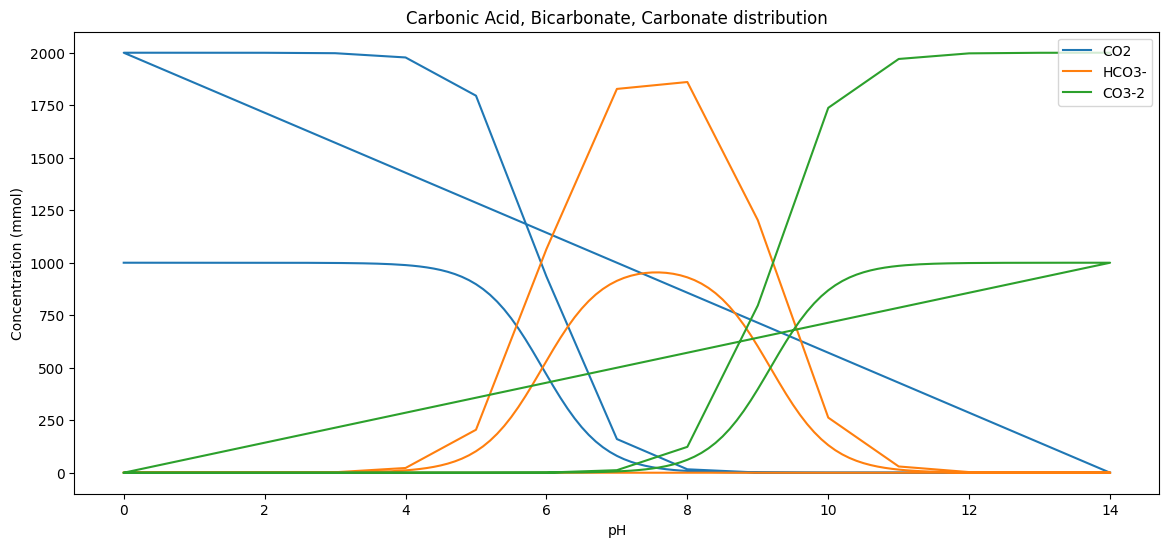

In [9]:
fig = plt.figure(figsize=[14,6])
plt.plot(phs,co2,label='CO2')
plt.plot(phs,hco3,label='HCO3-')
plt.plot(phs,co3,label='CO3-2')
plt.xlabel("pH")
plt.ylabel("Concentration (mmol)")
plt.title("Carbonic Acid, Bicarbonate, Carbonate distribution")
lgnd = plt.legend()